In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Assuming an intervention, what does the birth rate of moose need to be to have a positive trend in Northeastern Minnesotan moose population?

The following data collected from the Minnesota DNR.

To make this model the following assumptions were made:

    -The birth rate of the moose remains constant

The parameters we took in for this model/simulation were:

    -


In [3]:
population = [8160, 8840, 6860, 7890, 7840, 5700, 4900, 4230, 2760, 4350, 3450, 4020, 3710, 3030];

In [4]:
years = range(2005,2019);

We then put the data into the TimeSeries, so it is easier to work with.

In [5]:
population_series = TimeSeries(population, index = years, dtype = float)

,values
2005,8160.0
2006,8840.0
2007,6860.0
2008,7890.0
2009,7840.0
2010,5700.0
2011,4900.0
2012,4230.0
2013,2760.0
2014,4350.0


Create a fucntion to calculate the average birth rate over time.  This was calculated using the assumption of a 25% death rate.  This value is from a New York Times article: https://www.nytimes.com/2013/10/15/science/earth/something-is-killing-off-the-moose.html

In [6]:
def birth_rate(population):
    sum=0
    #print(population[0])
    for i in range(13):
        birth = population[i+1]/population[i]-0.75
        sum = sum + birth
        #print(sum)
    avgbirth = sum/14
    return avgbirth
#print('average birth rate =', birth_rate(population))
avgbirth = birth_rate(population)
print(avgbirth)

0.18782875308272756


Create a function for the line of best fit to show the trend of the moose population over time.

In [7]:
def f(years):
    t = TimeSeries()
    for x in (0, 2050):
        y = (-454.286*x) + 919206
        t[x] = y
    return t

Create a scatter plot of the past data by year and plot a line of best fit for the data, which shows the overall negative trend.

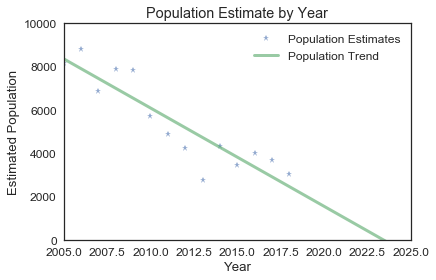

In [8]:
def population_graph(series):
    plot(series, '*', label='Population Estimates')
    plot(f(years), label='Population Trend')
    decorate(xlabel = 'Year',
           ylabel = 'Estimated Population',
           title = 'Population Estimate by Year')
    plt.ylim([0, 10000]);
    plt.xlim([2005, 2025]);
    
population_graph(population_series)

Create a SweepSeries for values for change in death rate.  This will allow us to sweep death rates to determine how 

In [9]:
a = 0.08
b = 0.25
c = 5

death_rate_sweep = linspace(a, b, c)

array([0.08  , 0.1225, 0.165 , 0.2075, 0.25  ])

We then created a linear line of best fit showing the general trend over time.  First we define a function that creates an array of values forming a line of best fit.  Then we plot these values on a plot.

In [10]:
time_initial = 2018;
moose = population_series[time_initial];
birth_rate = avgbirth;
death_rate = death_rate_sweep;
duration = 10;

In [11]:
system = System(time_initial=time_initial,
               moose=moose,
               birth_rate=birth_rate,
               #death_rate=death_rate,
               duration=duration)

,values
time_initial,2018.000000
moose,3030.000000
birth_rate,0.187829
duration,10.000000


In [12]:
print(death_rate_sweep[0])

0.08


In [13]:
def update_func(pop, t, system, i, death_rate_sweep):
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    return pop + net_growth

In [14]:
def run_simulation(system, update_func, i):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    #for i in range(c):
    results[i] = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system, i, death_rate_sweep)
        
    return results

In [15]:
#def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system)
        
    return results

IndentationError: unexpected indent (<ipython-input-15-e18ec91a4b85>, line 2)

In [ ]:
for i in range(c):
    results = run_simulation(system, update_func, i)

In [ ]:
def plot_sim()
    plot run_simulation

Simulate the upcoming years assuming no intervention.

In [ ]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [ ]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

In [ ]:
#plot predition and initial data

In [ ]:
#def plot_all_sim(system, update_function, iterations):
   # for i in range(iterations):
        #results = simulation(system, update_function)
        #plot(results, )


The results of the model are

In [27]:
death = linspace(0.08, 0.25, 5)

array([0.08  , 0.1225, 0.165 , 0.2075, 0.25  ])

In [58]:
def update_func(pop, t, system, death_rate_sweep, death):
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    #net_growth = (system.birth_rate - death_rate_sweep[i]) * pop
    net_growth = ((system.birth_rate * pop) - (death * pop))
    return pop + net_growth

In [59]:
def run_simulation(system, update_func, death):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    #for i in range(c):
    results = TimeSeries()
    results[system.time_initial] = system.moose
    
    for t in linrange(system.time_initial, system.time_initial + system.duration):
        results[t+1] = update_func(results[t], t, system, death_rate_sweep, death)
        
    return results

In [60]:
death_rate = linspace(0.08, 0.25, 5)
for death in death_rate:
    print(death)

0.08
0.1225
0.16499999999999998
0.20750000000000002
0.25


In [65]:
sweep = SweepSeries()

for death in death_rate:
    death_rate_sim = run_simulation(system, update_func, death)
    sweep[death] = death_rate_sim

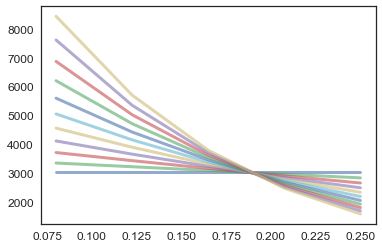

In [62]:
plot(sweep)

In [74]:
print(sweep+1)
#delete first value in sweep series.
#data type object
#plot year vs population
#sweep-1 only does population values



0.0800    2018    3031.000000
2019    3357.721122
2020  ...
0.1225    2018    3031.000000
2019    3228.946122
2020  ...
0.1650    2018    3031.000000
2019    3100.171122
2020  ...
0.2075    2018    3031.000000
2019    2971.396122
2020  ...
0.2500    2018    3031.000000
2019    2842.621122
2020  ...
dtype: object
